In [1]:
import numpy as np
import pennylane as qml

In [2]:
dev = qml.device("default.qubit", wires=4)

In [3]:
@qml.qnode(dev)
def circuit(params):
    # |psi_0>: state preparation
    qml.RY(np.pi / 4, wires=0)
    qml.RY(np.pi / 3, wires=1)
    qml.RY(np.pi / 7, wires=2)

    # V0(theta0, theta1): Parametrized layer 0
    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)

    # W1: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    # V_1(theta2, theta3): Parametrized layer 1
    qml.RY(params[2], wires=1)
    qml.RX(params[3], wires=2)

    # W2: non-parametrized gates
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    return qml.expval(qml.PauliY(0))

In [6]:
steps = 200
init_params = np.array([0.432, -0.123, 0.543, 0.233])

In [10]:
qng_cost = []
opt = qml.QNGOptimizer(0.01)

theta = init_params
for _ in range(steps):
    theta = opt.step(circuit, theta)
    print(theta)
    qng_cost.append(circuit(theta))

[ 0.41161642 -0.13820944  0.54801989  0.23337715]
[ 0.39100951 -0.15365523  0.55325511  0.23381883]
[ 0.37020142 -0.16933447  0.55870964  0.23433005]
[ 0.34921593 -0.18524351  0.56438695  0.23491596]
[ 0.32807842 -0.20137791  0.57028995  0.23558176]
[ 0.3068158  -0.21773243  0.57642093  0.23633272]
[ 0.28545649 -0.234301    0.5827815   0.23717411]
[ 0.26403035 -0.2510767   0.58937258  0.23811117]
[ 0.24256852 -0.26805178  0.59619431  0.23914904]
[ 0.22110338 -0.28521762  0.6032461   0.24029276]
[ 0.19966837 -0.30256479  0.6105265   0.24154718]
[ 0.17829785 -0.32008303  0.61803328  0.24291693]
[ 0.15702693 -0.3377613   0.62576335  0.24440636]
[ 0.13589127 -0.35558782  0.6337128   0.24601951]
[ 0.11492689 -0.37355009  0.64187688  0.24776003]
[ 0.09416997 -0.391635    0.65025003  0.24963116]
[ 0.07365656 -0.40982884  0.65882593  0.25163572]
[ 0.05342242 -0.4281174   0.66759749  0.25377599]
[ 0.03350275 -0.44648606  0.67655691  0.25605376]
[ 0.01393194 -0.46491985  0.68569577  0.25847027]


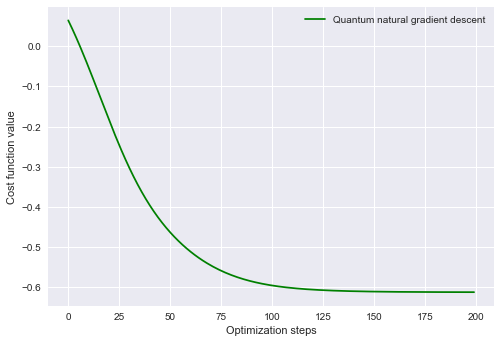

In [9]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.plot(qng_cost, "g", label="Quantum natural gradient descent")

plt.ylabel("Cost function value")
plt.xlabel("Optimization steps")
plt.legend()
plt.show()